In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Read the csv

In [2]:
data = pd.read_csv("D:\Desktop\Google Proyect\DATA\OUT\data_sin_outliers.csv", delimiter=',',index_col=False)

In [3]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
data= pd.DataFrame(data)


data = data.drop(columns=['Dt_Customer', 'ID'], inplace=False)

In [5]:
data = pd.DataFrame(data)

Data gets trimmed: "Marital_Status" and "Education" columns are removed, creating a new copy.

In [6]:
data = data.drop(columns=['Marital_Status', 'Education'], inplace=False)

In [7]:
#Separamos en X e y
X = data.drop(['Kidhome'], axis = 1)
y = data['Kidhome']

The Linear Regression Model begins to be created.

In [8]:
# Import necessary library for creating the model
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# X_train and y_train will be 70% of the data, and X_test and y_test will be 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [9]:
X_train.shape, X_test.shape

((1543, 24), (662, 24))

In [10]:
y_train.shape, y_test.shape

((1543,), (662,))

In [11]:
X_train.head()

,Year_Birth,Income,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
584,1960,62807.0,1,83,526,28,135,10,21,99,...,5,0,0,0,0,0,0,3,11,0
1709,1954,70044.0,1,46,1073,0,250,153,14,14,...,5,0,0,0,0,0,0,3,11,0
292,1966,27038.0,0,64,1,26,25,17,23,15,...,9,0,0,0,0,0,0,3,11,1
1113,1976,85606.0,1,89,717,42,864,219,30,84,...,3,0,0,0,1,0,0,3,11,0
1105,1962,39552.0,1,54,165,3,147,4,24,41,...,8,0,0,0,0,0,0,3,11,1


In [12]:
X_train.dtypes

Year_Birth               int64
Income                 float64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [13]:
# Import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree model
# - max_depth is set to 5, limiting the maximum depth of the tree to control overfitting
# - random_state is set to 0 for reproducibility
tree = DecisionTreeClassifier(max_depth=5, random_state=0)


In [14]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [15]:
# Calculate predictions on the training set
y_train_pred_tree = tree.predict(X_train)

# Calculate predictions on the test set
y_test_pred_tree = tree.predict(X_test)


In [16]:
y_train_pred_tree

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

Code checks how well a Decision Tree model predicts.

In [17]:
# Import necessary metric
from sklearn.metrics import accuracy_score

# Calculate accuracy on the training set
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

# Calculate accuracy on the test set
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

# Print the accuracy scores
print('The accuracy on the training set is:', train_accuracy_tree)
print('The accuracy on the test set is:', test_accuracy_tree)


The accuracy on the training set is: 0.8703823720025924
The accuracy on the test set is: 0.8293051359516617



Decision Tree trained, feature importance analyzed & plotted: bar chart shows key features driving the model's predictions.

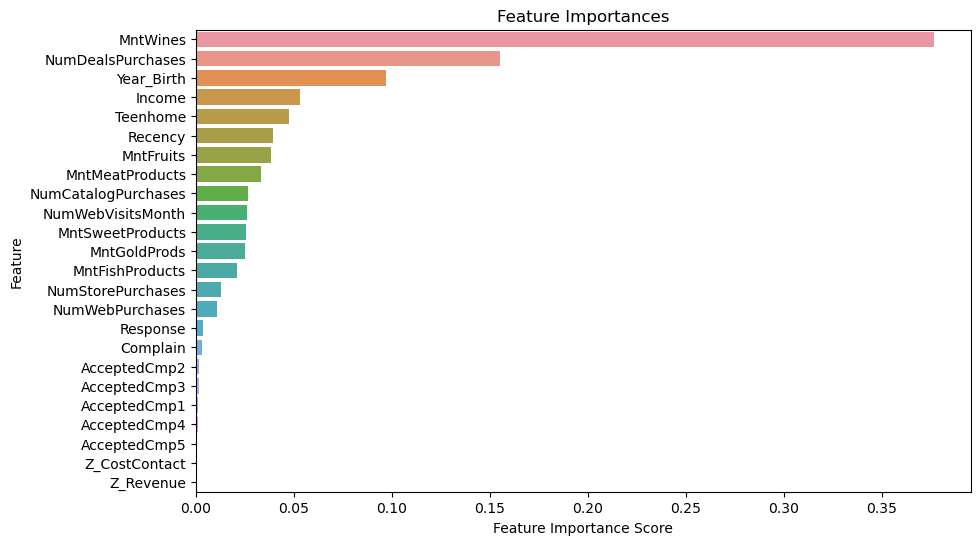

In [18]:


# Initialize the model
tree_model = DecisionTreeClassifier()

# Fit the model to the data
tree_model.fit(X, y)

# Get feature importances
features_importance = tree_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': features_importance})

# Convert 'Importance' column to numeric type
feature_importance_df['Importance'] = pd.to_numeric(feature_importance_df['Importance'])

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()



Cross validation is used to find the best parameters

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(tree_model, param_grid, cv=50, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X, y)

# Print the best hyperparameters and their score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


C:\Users\Familia\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 46 members, which is less than n_splits=50.
  warnings.warn(


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Accuracy: 0.8594646464646465


The Random Forest Model begins to be created to search another model with better metrics and repeat the same process.

In [20]:
#Import random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state =0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [21]:
# Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)


In [22]:

# Calculate accuracy on the training set for the Random Forest model
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

# Calculate accuracy on the test set for the Random Forest model
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print the accuracy scores for the Random Forest model
print('The accuracy on the training set is:', train_accuracy_rf)
print('The accuracy on the test set is:', test_accuracy_rf)

# Note: It's mentioned that reducing the number of estimators could help mitigate overfitting.


The accuracy on the training set is: 0.9896305897602073
The accuracy on the test set is: 0.8761329305135952


Cross validation is used to find the best parameters

In [23]:


param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search_rf.fit(X, y)

# Print the best hyperparameters and their score
print("Best Hyperparameters:", grid_search_rf.best_params_)
print("Best Accuracy:", grid_search_rf.best_score_)



Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.890249433106576


....................................

In [24]:
# Visualizacion de las feature importantes
features_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
features_scores

MntWines               0.171425
MntFishProducts        0.100571
NumDealsPurchases      0.091833
Income                 0.089221
Year_Birth             0.082356
NumWebVisitsMonth      0.071904
NumWebPurchases        0.055526
MntGoldProds           0.052733
MntMeatProducts        0.049542
MntFruits              0.041342
MntSweetProducts       0.041251
Recency                0.040846
NumStorePurchases      0.039455
NumCatalogPurchases    0.035488
Teenhome               0.017737
AcceptedCmp5           0.004732
AcceptedCmp3           0.004537
AcceptedCmp1           0.003302
Response               0.003200
AcceptedCmp4           0.001692
Complain               0.001136
AcceptedCmp2           0.000171
Z_CostContact          0.000000
Z_Revenue              0.000000
dtype: float64

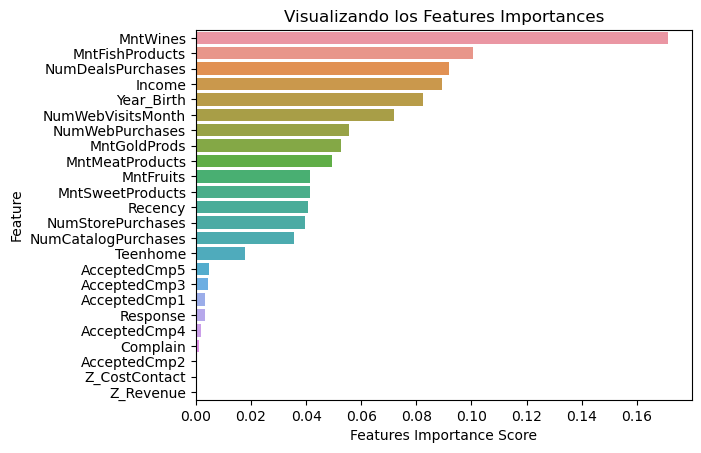

In [25]:
#Barplot
import matplotlib.pyplot as plt

sns.barplot(x=features_scores , y = features_scores.index)
plt.xlabel('Features Importance Score')
plt.ylabel('Feature')
plt.title("Visualizando los Features Importances")
plt.show()

Three specific columns (Z_CostContact, Z_Revenue, and AcceptedCmp2) get chopped from X because they have a 0 in the importance score.

In [26]:
columns_to_drop = ['Z_CostContact', 'Z_Revenue', 'AcceptedCmp2']
X.drop(columns=columns_to_drop)

,Year_Birth,Income,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,Response
0,1957,58138.0,0,58,635,88,546,172,88,88,...,8,10,4,7,0,0,0,0,0,1
1,1954,46344.0,1,38,11,1,6,2,1,6,...,1,1,2,5,0,0,0,0,0,0
2,1965,71613.0,0,26,426,49,127,111,21,42,...,8,2,10,4,0,0,0,0,0,0
3,1984,26646.0,0,26,11,4,20,10,3,5,...,2,0,4,6,0,0,0,0,0,0
4,1981,58293.0,0,94,173,43,118,46,27,15,...,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,1967,61223.0,1,46,709,43,182,42,118,247,...,9,3,4,5,0,0,0,0,0,0
2201,1946,64014.0,1,56,406,0,30,0,0,8,...,8,2,5,7,0,0,0,1,0,0
2202,1981,56981.0,0,91,908,48,217,32,12,24,...,2,3,13,6,0,1,0,0,0,0
2203,1956,69245.0,1,8,428,30,214,80,30,61,...,6,5,10,3,0,0,0,0,0,0


We create a Random Forest with the best parameters.

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc_x = StandardScaler().fit(X_train)
X_train_scaled = sc_x.transform(X_train)
X_test_scaled = sc_x.transform(X_test)

# Initialize the RandomForestClassifier with the best hyperparameters
rf_classifier = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model 
accuracy = np.mean(y_pred == y_test)
print(f'Model Accuracy: {accuracy:.4f}')

Model Accuracy: 0.8753



Random Forest model tested on unseen data: high accuracy (88%) for two main classes, but class 2 needs improvement. More digging can optimize performance.

In [30]:
from sklearn.metrics import classification_report

# Predict on the test set using your RandomForestClassifier
y_test_pred_rf = rf_classifier.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_test_pred_rf))


              precision    recall  f1-score   support

           0       0.92      0.91      0.91       254
           1       0.82      0.88      0.85       177
           2       0.00      0.00      0.00        10

    accuracy                           0.88       441
   macro avg       0.58      0.60      0.59       441
weighted avg       0.86      0.88      0.87       441



C:\Users\Familia\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Familia\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Familia\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Code saves trained linear regression model named slr as Random_Forest.pkl

In [31]:
import joblib
joblib.dump(rf_classifier, 'D:\Desktop\Google Proyect\MODELS\EXPORTED MODELS\Random_Forest.pkl')

['D:\\Desktop\\Google Proyect\\MODELS\\EXPORTED MODELS\\Random_Forest.pkl']